# **Blinkit Sales Performance Analysis – Exploratory Data Analysis (EDA)**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("E:/DATA ANALYTICS/MODULE 2 (PYTHON)/project EDA/blinkit/blinkit_data.csv")
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **Data Overview and Understanding**
##### Objective: Understand dataset structure, features, and scale.

In [11]:
df.shape

(8523, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Descriptive Statistics**
##### Objective: Analyze distribution and summary statistics of numerical features.

In [16]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## **Data Cleaning and Quality Checks**
##### Objective: Identify and handle missing values and inconsistent entries.

In [27]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [145]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat',
                                                         'low fat':'Low Fat',
                                                         'reg':'Regular'})
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [30]:
df['Outlet Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [146]:
df['Outlet Size'] = df['Outlet Size'].replace({'High':'Large'})
df['Outlet Size'].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [123]:
df['Outlet Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [147]:
df['Outlet Type'] = df['Outlet Type'].replace({'Supermarket Type1': 'Supermarket',
                                              'Supermarket Type2': 'Supermarket',
                                              'Supermarket Type3':'Supermarket'})
df['Outlet Type'].unique()

array(['Supermarket', 'Grocery Store'], dtype=object)

## **Data Analysis**

### Key Business Insights
Objective: Convert analysis into decision-ready insights

In [35]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
no_of_items = df['Sales'].count()
avg_rating = df['Rating'].mean()

In [37]:
print(f"Total sales: ${total_sales:,.0f}")
print(f"Average sales: ${avg_sales:,.2f}")
print(f"No of Items Sold: {no_of_items:,.0f}")
print(f"Average Rating: {avg_rating:,.2f}")

Total sales: $1,201,681
Average sales: $140.99
No of Items Sold: 8,523
Average Rating: 3.97


### Charts

### Total Sales by Fat Content
Objective: Evaluate product composition impact on sales.

In [41]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
sales_by_fat

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

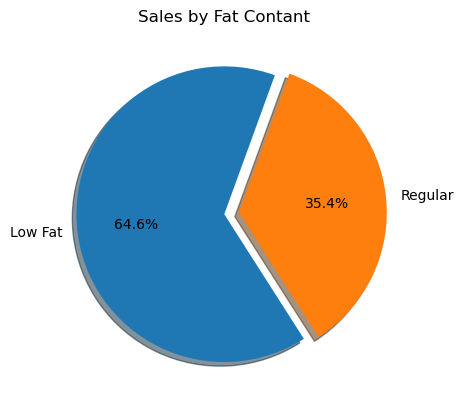

In [56]:
explode = (0,0.1)
plt.pie(sales_by_fat, labels = sales_by_fat.index, 
                                autopct ='%.1f%%',
                                shadow=True,
                                explode=explode,
                                startangle= 70)
plt.title('Sales by Fat Contant')
plt.show()

### Sales by Item Type
Objective: Identify top and bottom performing product categories.

In [67]:
sales_by_items = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=True)
sales_by_items

Item Type
Seafood                    9077.8700
Breakfast                 15596.6966
Starchy Foods             21880.0274
Others                    22451.8916
Hard Drinks               29334.6766
Breads                    35379.1198
Soft Drinks               58514.1650
Meat                      59449.8638
Health and Hygiene        68025.8388
Baking Goods              81894.7364
Canned                    90706.7270
Dairy                    101276.4596
Frozen Foods             118558.8814
Household                135976.5254
Snack Foods              175433.9204
Fruits and Vegetables    178124.0810
Name: Sales, dtype: float64

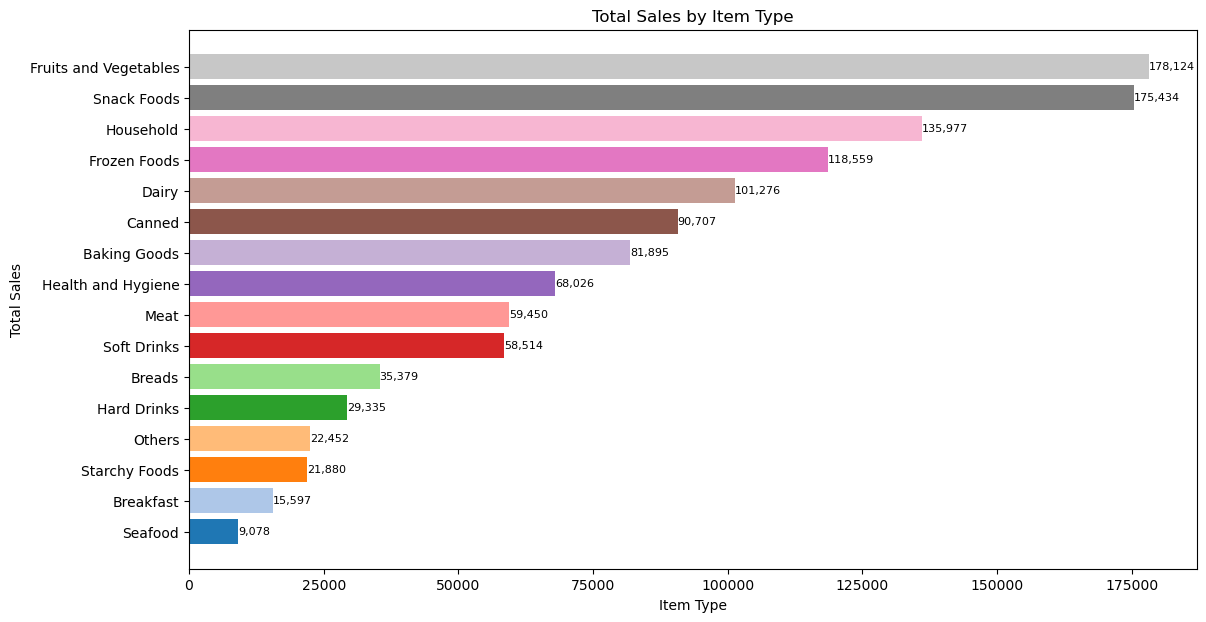

In [89]:
plt.figure(figsize=(13,7))
bars = plt.barh(sales_by_items.index,
         sales_by_items.values,
        color=plt.cm.tab20.colors)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(
        bar.get_width(),                         
        bar.get_y() + bar.get_height()/2,  
        f'{bar.get_width():,.0f}',
        va='center',
        fontsize=8
    )
    
plt.show()

### Fat Content by Outlet for Total Sales
Objective: Evaluate product composition impact on sales.

In [92]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped

Item Fat Content,Low Fat,Regular
Outlet Location Type,,
Tier 1,215047.9126,121349.8994
Tier 2,254464.7734,138685.8682
Tier 3,306806.9924,165326.0348


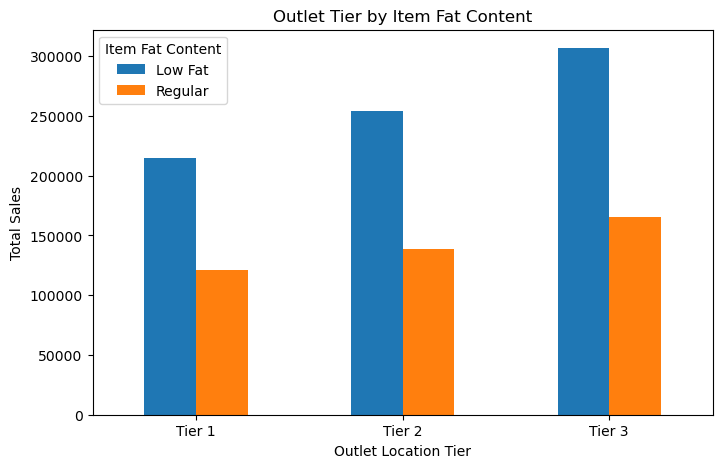

In [99]:
ax = grouped.plot(kind='bar',
                  figsize=(8,5),
                  title = 'Outlet Tier by Item Fat Content')

plt.xticks(rotation=0)
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
plt.show()

### Outlet Establishment Year Analysis
Objective: Understand how store age influences performance.

In [110]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

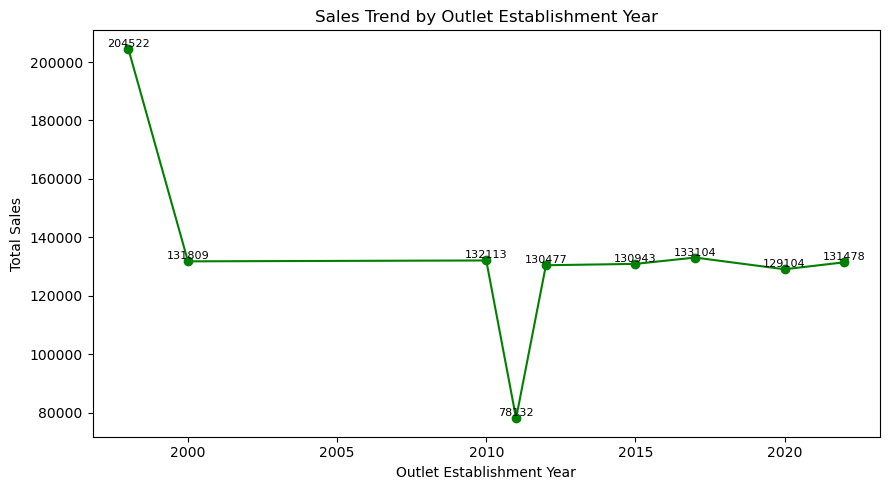

In [119]:

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, 
         sales_by_year.values, 
         marker='o', 
         linestyle='-',
        color = 'green')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Sales by Outlet Size
Objective: Understand impact of store size on revenue.

In [108]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
sales_by_size

Outlet Size
Large     248991.5840
Medium    507895.7284
Small     444794.1684
Name: Sales, dtype: float64

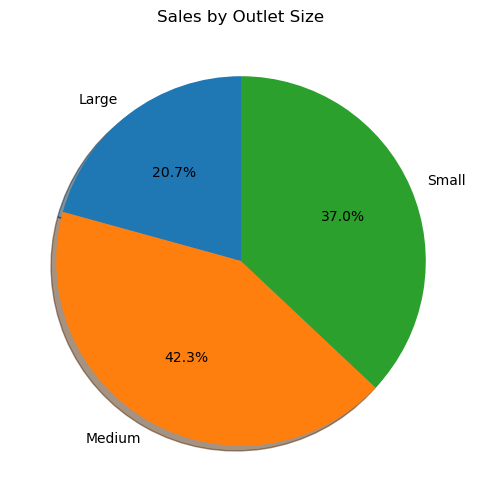

In [148]:
plt.figure(figsize=(6, 6))
plt.pie(sales_by_size, 
        labels=sales_by_size.index, 
        autopct='%1.1f%%', 
        startangle=90,
       shadow = True)
plt.title('Sales by Outlet Size')
plt.show()

### Sales by Outlet Location Tier
Objective: Analyze geographic performance differences.

In [115]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum()
sales_by_location

Outlet Location Type
Tier 1    336397.8120
Tier 2    393150.6416
Tier 3    472133.0272
Name: Sales, dtype: float64

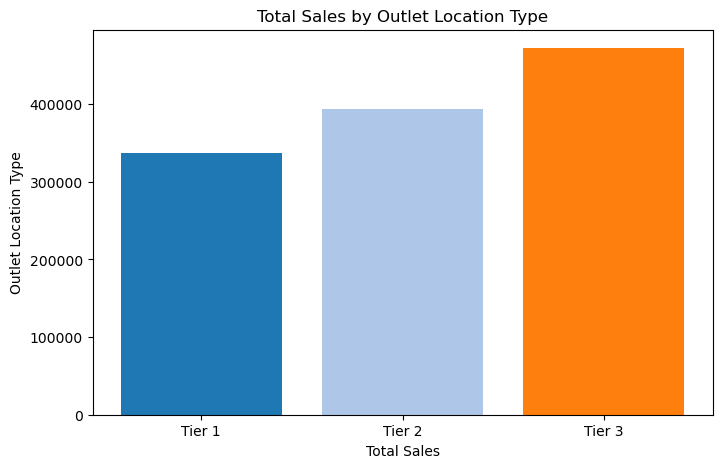

In [118]:
plt.figure(figsize=(8, 5)) 
plt.bar(sales_by_location.index,
        sales_by_location.values,
       color =plt.cm.tab20.colors)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.show()

### Sales by Outlet Type
Objective: Compare performance across outlet formats

In [128]:
sales_by_outlet_type = df.groupby('Outlet Type')['Sales'].sum()
sales_by_outlet_type

Outlet Type
Grocery Store    1.519391e+05
Supermarket      1.049742e+06
Name: Sales, dtype: float64

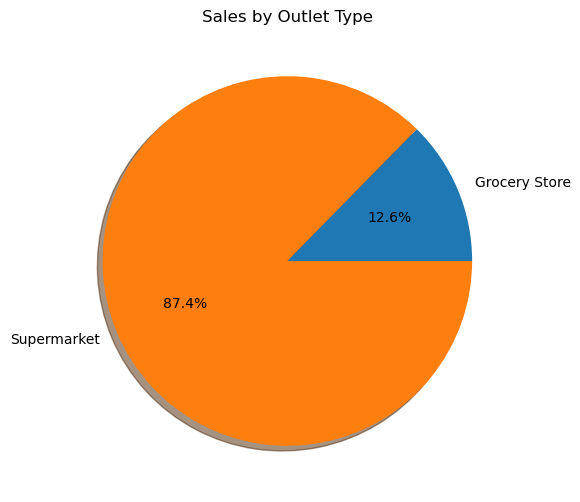

In [131]:
plt.figure(figsize=(6, 6))
plt.pie(sales_by_outlet_type, 
        labels=sales_by_outlet_type.index, 
        autopct='%1.1f%%', 
        startangle=0,
       shadow = True)
plt.title('Sales by Outlet Type')
plt.show()